In [1]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgba
import math
import time
import networkx as nx


In [2]:
from NeuralNetwork import * 
from Observation import *
from AgentModule import *
from InitializationVariables import *
from Environment import *
from Evolution import *

imported Neural Network module
Imported initialized Variables
imported Observation
imported Agent module
Imported environ
imported evolution module


In [3]:
#Initialize environment and next_environment
environment, agents, environment_pop_density = initialize()
agents = initializeAgents(agent_count, agents)
barrierMask = getBarrierMask()
distToBarrier = getBarrierMaskDist(barrierMask)
survivalMask = getSurvivalMask()

In [4]:
starter_agents = agents

In [5]:
# #For an easier environment that reaches equilibrium much faster
barrierMask = getEmptyBarrierMask()
survivalMask[0:-1,0:-1] = 0
# survivalMask[environment_xSize//4 : 3*environment_xSize//4, environment_ySize//4 : 3*environment_ySize//4  ]= 1
survivalMask[:, 0 :environment_xSize//4   ]= 1

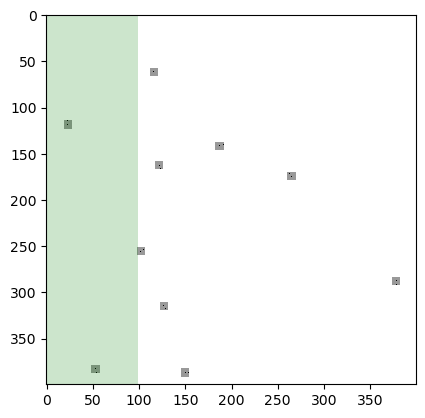

In [6]:
livingAgents, environment, killCount = runCycle(steps_per_cycle, agents, environment, barrierMask, distToBarrier, survivalMask, environment_pop_density, False)


agents = livingAgents ##Random pt at 200,100

agents = repopulateAgents(livingAgents, monogamous)


In [7]:
countAlive = np.zeros(numGenerations)
countKilled = np.zeros(numGenerations)
geneticSimilarity = np.zeros(numGenerations)

timeStart = time.time()
for i in tqdm(range(numGenerations), desc="Processing", unit="cycle"):
    livingAgents, environment, killcount = simCycle(steps_per_cycle, agents, environment, barrierMask, distToBarrier, survivalMask,environment_pop_density, killing)
    countAlive[i] = len(livingAgents)/agent_count
    countKilled[i] = killcount/agent_count
    temp_agents = agents
    if len(livingAgents) > 0: 
        # print(f'extinct at generation {i}')
        agents = repopulateAgents(livingAgents, monogamous)
    else:
        agents = repopulateAgents(agents, monogamous)
    geneticSimilarity[i] = getGeneticSimilarity(agents, temp_agents)
    # if i % plot_freq ==0 : print(f'finished cycle {i}')
   
timeEnd = time.time()

print(f'Time elapsed = {(timeEnd - timeStart )/ 60} minutes')
print(f'Time per run = {(timeEnd - timeStart)/numGenerations}')

Processing: 100%|██████████████████████████| 400/400 [04:34<00:00,  1.46cycle/s]

Time elapsed = 4.568584601084392 minutes
Time per run = 0.6852876901626587


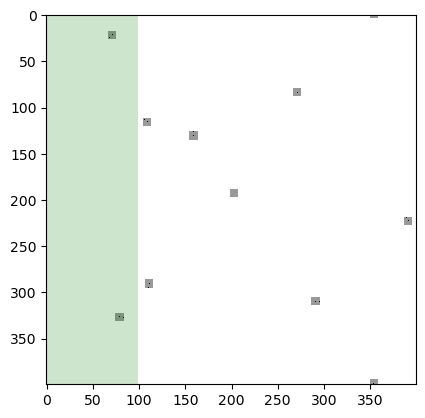

In [8]:
agents = repopulateAgents(livingAgents, monogamous)
livingAgents, environment, killcount = runCycle(steps_per_cycle, agents, environment, barrierMask, distToBarrier, survivalMask,environment_pop_density, False)


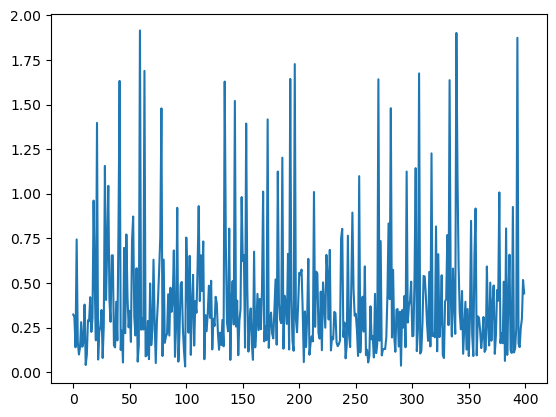

In [9]:
plt.plot(geneticSimilarity)

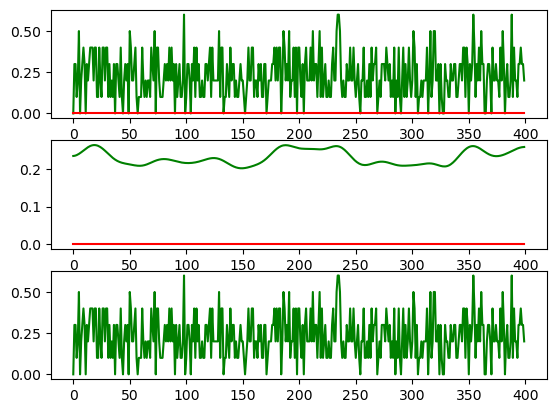

In [10]:
from scipy.ndimage import gaussian_filter

fig, axes = plt.subplots(3,1)

axes[0].plot(countAlive, 'g')
axes[0].plot(countKilled, 'r')
axes[1].plot(gaussian_filter(countAlive, sigma=10), 'g')
axes[1].plot(gaussian_filter(countKilled, sigma=10), 'r')
axes[2].plot(countAlive / (1 - countKilled), 'g')


In [15]:
agents[4].agentBrain.applyMtx()

array([189.71669895, 203.77874184,  72.13624929, 111.07712217,
       262.58945529, 218.88692765, -16.83291567])